In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [25]:
data = pd.read_csv('data.csv')

In [26]:
data.head()

,CPU times,RSS memory,VMS memory,Shared memory,Text segment,Data segment,Library code,Memory Percent
0,1.10,3.887142e+06,7.125203e+06,2.962135e+06,20288.598131,1.367298e+06,0.0,0.047623
1,1.05,1.070678e+07,1.367124e+07,3.191868e+06,12167.529412,7.932225e+06,0.0,0.131174
2,0.19,1.925399e+06,6.064407e+06,1.753274e+06,16011.636364,3.922851e+05,0.0,0.023589
3,1.15,1.015220e+07,1.680852e+07,2.197718e+06,8173.755011,1.102968e+07,0.0,0.124379
4,2.86,5.384785e+06,8.613213e+06,3.056666e+06,20404.981685,2.822279e+06,0.0,0.065972


In [27]:
X = data.drop(['Library code'], axis=1)

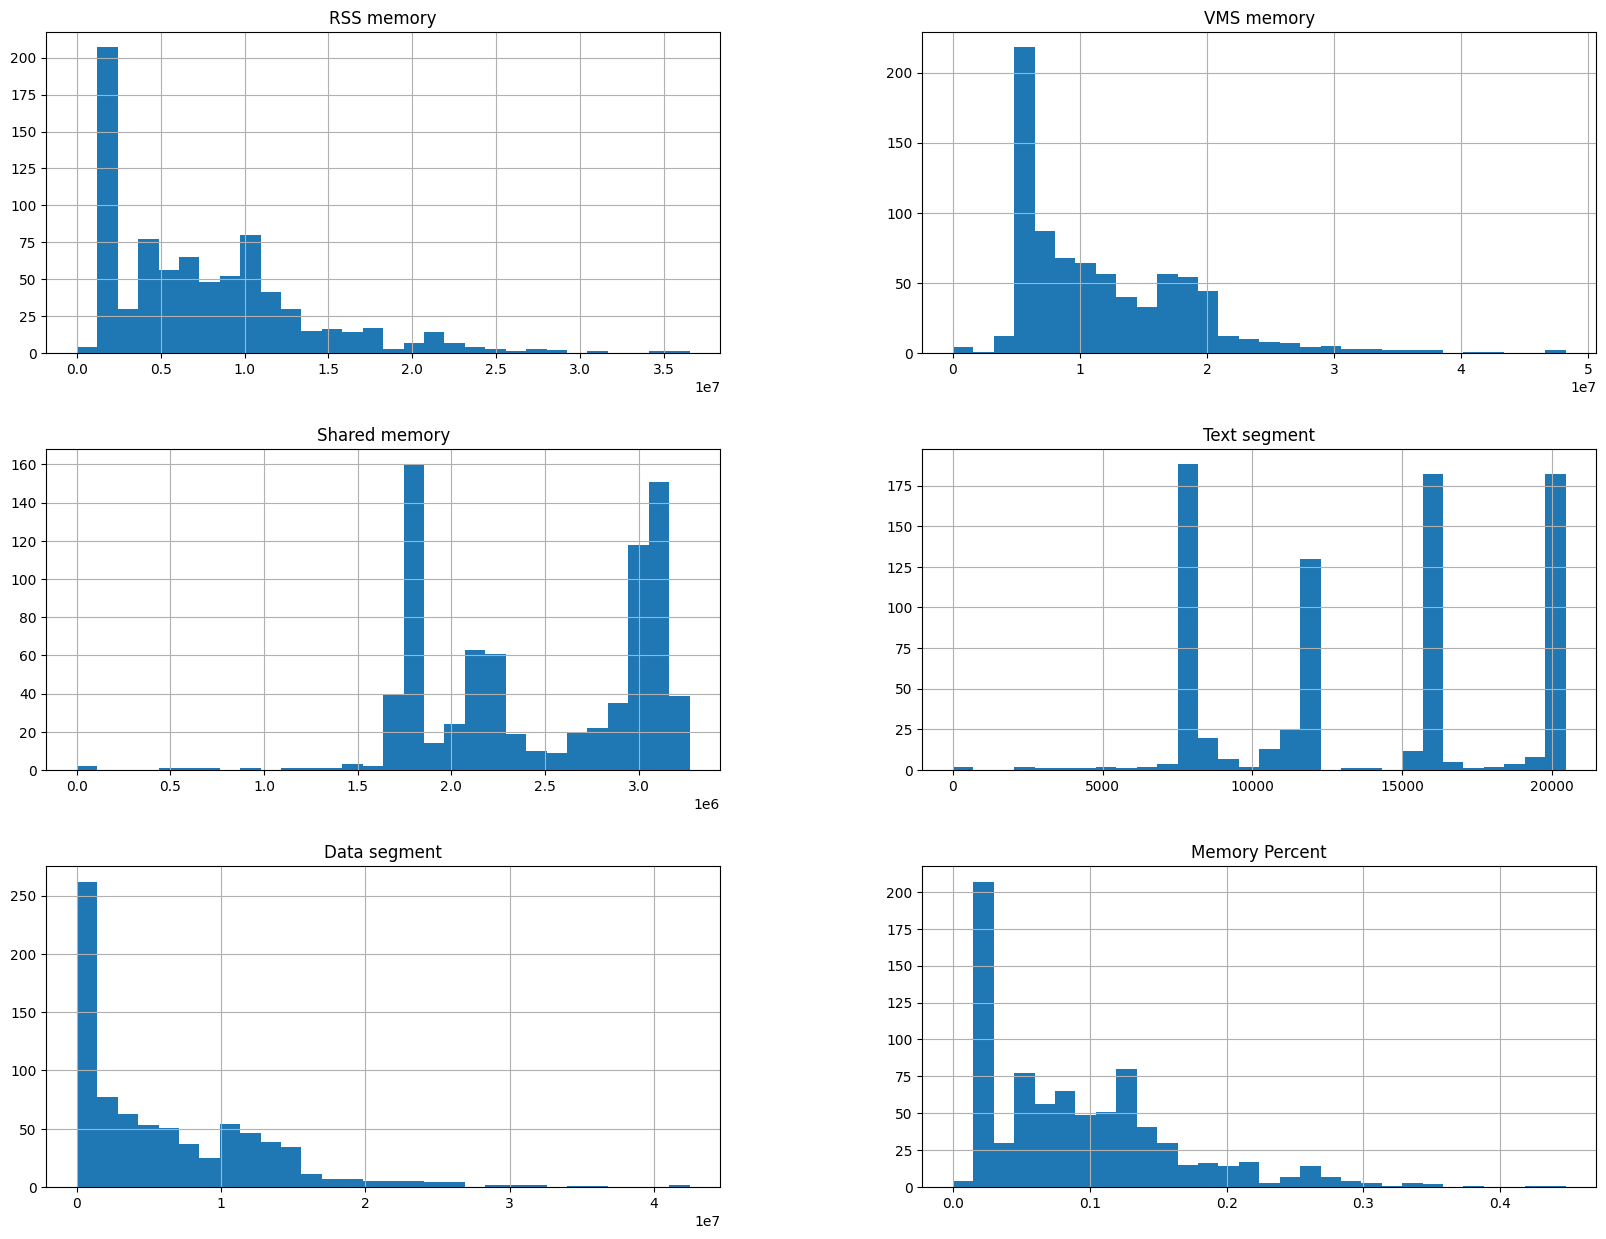

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
X.hist(bins=30, figsize=(20,15))
plt.show()

In [29]:
corr_matrix  = X.corr()
corr_matrix['CPU times'].sort_values(ascending=False)

CPU times         1.000000
Shared memory     0.533766
Text segment      0.435441
Memory Percent    0.280154
RSS memory        0.280124
VMS memory        0.176209
Data segment      0.163244
Name: CPU times, dtype: float64

In [30]:
y = X['CPU times']
X.drop('CPU times', axis=1, inplace=True)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [34]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.33319835678999754


In [36]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))
model2 = pickle.load(open('model.pkl', 'rb'))

In [37]:
y_pred = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.33319835678999754
